In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt # plots
import seaborn as sns

from sklearn.model_selection import train_test_split # splitting dataframes and subsplits
from sklearn.ensemble import RandomForestClassifier

# evaluation metrics
from sklearn.metrics import classification_report # f1 scores
from sklearn.metrics import confusion_matrix # prediction vs actual
from sklearn.metrics import accuracy_score # overall score
from sklearn.model_selection import cross_val_score # check for overfitting and model stability

sns.set(style="darkgrid") # plotting if any
# plot formatting
%matplotlib inline

In [2]:
# this is for 50k users from each country with two timestamps except for nigeria, south africa, russia, and china
# compare US to each of 7 other countries
# see if model can determine differences between these two countries
# based on timestamps
# hypothesis is users from different parts of world will have different timestamps

# steps
# step 1 - import csv files

# step 2 - clean dfs to get only datetime,
# change local to number based on key

# key 
# 1: UK,
# 2: US,
# 3: CHINA,
# 4: INDIA,
# 5: RUSSIA,
# 6: NIGERIA,
# 7: SOUTHAFRICA,
# 8: BRAZIL

# use parsed and minute of week

# step 3 - make functions to combine and shuffle

# step 4 - modeling, functions here too,
# fit,
# test and get scores,

# repeat steps 3&4 for each pair for total of 7

In [3]:
# function to fit, predict, score for training and testing set
def fit_pred_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    class_report = (classification_report(y_test, y_pred))
    conf_mat = (confusion_matrix(y_test, y_pred))
    acc_score = (accuracy_score(y_test, y_pred))
    print(model)
    print(class_report)
    print(conf_mat)
    return acc_score
def fit_pred_score_noprint(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    class_report = (classification_report(y_test, y_pred))
    conf_mat = (confusion_matrix(y_test, y_pred))
    acc_score = (accuracy_score(y_test, y_pred))
    return acc_score

In [4]:
# df's to combine, which countries
# append
# shuffle 
# get columns
def pair_tobe_tested(df1, df2):
    dfname = pd.DataFrame()
    dfname = df1.append(df2)
    dfname = dfname.sample(frac=1).reset_index(drop=True)
    dfname = dfname[['activity', 'minute_of_week', 'minute_of_week2', 'local']]
    return dfname

In [5]:
# import csv files

# brazil.csv	india.csv	russia.csv	uk.csv
# china.csv	nigeria.csv	southafrica.csv	us.csv
df_uk = pd.read_csv('uk.csv')
df_us = pd.read_csv('us.csv')
df_chn = pd.read_csv('china.csv')
df_ind = pd.read_csv('india.csv')
df_rus = pd.read_csv('russia.csv')
df_ng = pd.read_csv('nigeria.csv')
df_sa = pd.read_csv('southafrica.csv')
df_bra = pd.read_csv('brazil.csv')

In [6]:
df_list = [df_uk, df_us, df_chn, df_ind, df_rus, df_ng, df_sa, df_bra]
for df in df_list:
    print(df.shape)

(50000, 5)
(50000, 5)
(49629, 5)
(50000, 5)
(32430, 5)
(12740, 5)
(15865, 5)
(50000, 5)


In [7]:
df_rus.head()

,id,location,LastAccessDate,CreationDate,activity
0,4279,"Moscow, Russia",2019-04-20 18:18:53,2008-09-02 16:10:17,27507
1,125816,"Moscow, Russia",2019-04-21 00:04:38,2009-06-19 15:31:19,23830
2,2877241,"Moscow, Russia",2019-04-17 16:36:24,2013-10-13 23:45:02,20356
3,2319407,"Russia, Saint-Petersburg",2019-04-21 05:13:16,2013-04-25 11:02:08,16051
4,876298,"Russia, Moscow",2019-04-20 21:09:41,2011-08-03 09:28:48,14755


In [8]:
# add parsed and minute_of_week
for df in df_list:
    df['parsed'] = pd.to_datetime(df['LastAccessDate'], format='%Y-%m-%d %H:%M:%S')
    df['parsed2'] = pd.to_datetime(df['CreationDate'], format='%Y-%m-%d %H:%M:%S')
    df['minute_of_week'] = df['parsed'].apply(lambda row: (row.dayofweek * 24 * 60) + (row.hour * 60) + (row.minute))
    df['minute_of_week2'] = df['parsed2'].apply(lambda row: (row.dayofweek * 24 * 60) + (row.hour * 60) + (row.minute))

In [9]:
# add local based on key
for df, i in zip(df_list, list(range(1,9))):
    df['local'] = i

In [10]:
df_rus.head()

,id,location,LastAccessDate,CreationDate,activity,parsed,parsed2,minute_of_week,minute_of_week2,local
0,4279,"Moscow, Russia",2019-04-20 18:18:53,2008-09-02 16:10:17,27507,2019-04-20 18:18:53,2008-09-02 16:10:17,8298,2410,5
1,125816,"Moscow, Russia",2019-04-21 00:04:38,2009-06-19 15:31:19,23830,2019-04-21 00:04:38,2009-06-19 15:31:19,8644,6691,5
2,2877241,"Moscow, Russia",2019-04-17 16:36:24,2013-10-13 23:45:02,20356,2019-04-17 16:36:24,2013-10-13 23:45:02,3876,10065,5
3,2319407,"Russia, Saint-Petersburg",2019-04-21 05:13:16,2013-04-25 11:02:08,16051,2019-04-21 05:13:16,2013-04-25 11:02:08,8953,4982,5
4,876298,"Russia, Moscow",2019-04-20 21:09:41,2011-08-03 09:28:48,14755,2019-04-20 21:09:41,2011-08-03 09:28:48,8469,3448,5


In [11]:
# use random forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10)

In [12]:
# comparison between uk and us
df_us_uk = pair_tobe_tested(df_us, df_uk)
X = df_us_uk[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_uk['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_uk = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           1       0.90      0.63      0.74     10000
           2       0.71      0.93      0.81     10000

   micro avg       0.78      0.78      0.78     20000
   macro avg       0.81      0.78      0.77     20000
weighted avg       0.81      0.78      0.77     20000

[[6255 3745]
 [ 682 9318]]
[0.7785   0.779625 0.782625 0.787875 0.788125 0.784875 0.774375 0.77675
 0.778    0.7845  ] 0.781525 0.004519679192155105


In [13]:
df_us_uk.head()

,activity,minute_of_week,minute_of_week2,local
0,0,2293,4963,1
1,7,1223,4057,1
2,256,7290,6337,2
3,64,4827,8797,2
4,11,4033,2795,1


In [14]:
# comparison between us and china
df_us_chn = pair_tobe_tested(df_us, df_chn)
X = df_us_chn[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_chn['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_chn = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           2       0.88      0.99      0.93     10000
           3       0.99      0.86      0.92      9926

   micro avg       0.93      0.93      0.93     19926
   macro avg       0.93      0.93      0.93     19926
weighted avg       0.93      0.93      0.93     19926

[[9902   98]
 [1385 8541]]
[0.92610714 0.92849078 0.92711078 0.92948557 0.92421581 0.92283563
 0.92283563 0.92521957 0.92986198 0.92220828] 0.9258371178331993 0.002691543315785334


In [15]:
# comparison between us and india
df_us_ind = pair_tobe_tested(df_us, df_ind)
X = df_us_ind[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_ind['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_ind = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           2       0.88      0.73      0.80     10000
           4       0.77      0.91      0.83     10000

   micro avg       0.82      0.82      0.82     20000
   macro avg       0.83      0.82      0.81     20000
weighted avg       0.83      0.82      0.81     20000

[[7253 2747]
 [ 944 9056]]
[0.807625 0.815    0.818625 0.811875 0.815375 0.820125 0.81375  0.814875
 0.81075  0.817   ] 0.8145 0.0035333235062756374


In [16]:
# comparison between us and russia
df_us_rus = pair_tobe_tested(df_us, df_rus)
X = df_us_rus[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_rus['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_rus = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           2       0.85      0.99      0.91     10000
           5       0.97      0.73      0.84      6486

   micro avg       0.89      0.89      0.89     16486
   macro avg       0.91      0.86      0.88     16486
weighted avg       0.90      0.89      0.88     16486

[[9874  126]
 [1735 4751]]
[0.89006823 0.88658074 0.88460955 0.88612585 0.88641189 0.88398544
 0.88838338 0.89005156 0.89050652 0.88717015] 0.8873893329635714 0.002180280982581089


In [17]:
# comparison between us and nigeria
df_us_ng = pair_tobe_tested(df_us, df_ng)
X = df_us_ng[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_ng['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_ng = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           2       0.97      1.00      0.98     10000
           6       1.00      0.87      0.93      2548

   micro avg       0.97      0.97      0.97     12548
   macro avg       0.98      0.94      0.96     12548
weighted avg       0.97      0.97      0.97     12548

[[10000     0]
 [  326  2222]]
[0.97071713 0.97450199 0.97429767 0.97011357 0.97668858 0.97369994
 0.97429767 0.97130903 0.96991433 0.97130903] 0.9726848930240385 0.0021796710616250794


In [18]:
# comparison between us and nigeria
df_us_sa = pair_tobe_tested(df_us, df_sa)
X = df_us_sa[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_sa['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_sa = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           2       0.93      1.00      0.96     10000
           7       0.99      0.78      0.87      3173

   micro avg       0.94      0.94      0.94     13173
   macro avg       0.96      0.89      0.92     13173
weighted avg       0.95      0.94      0.94     13173

[[9979   21]
 [ 707 2466]]
[0.94364326 0.93795066 0.94192446 0.94078573 0.94287341 0.94268362
 0.93623078 0.94116531 0.95103435 0.9466692 ] 0.9424960790676049 0.003959145403687128


In [19]:
# comparison between us and nigeria
df_us_bra = pair_tobe_tested(df_us, df_bra)
X = df_us_bra[['activity', 'minute_of_week', 'minute_of_week2']]
y = df_us_bra['local']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
acc_us_bra = fit_pred_score_noprint(rfc, X_train, y_train, X_test, y_test)
fit_pred_score(rfc, X_train, y_train, X_test, y_test)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores, scores.mean(), scores.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           2       0.81      1.00      0.89     10000
           8       0.99      0.77      0.87     10000

   micro avg       0.88      0.88      0.88     20000
   macro avg       0.90      0.88      0.88     20000
weighted avg       0.90      0.88      0.88     20000

[[9958   42]
 [2338 7662]]
[0.8745   0.881125 0.87875  0.87625  0.876875 0.8765   0.8745   0.884125
 0.87525  0.878375] 0.8776249999999999 0.0029192250684042975


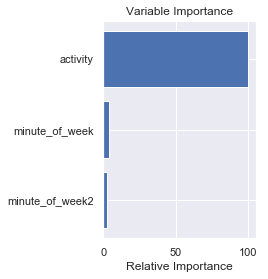

In [20]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

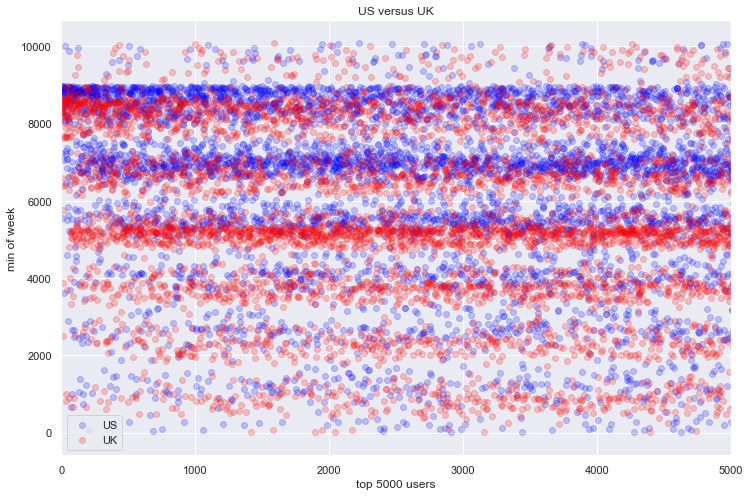

In [36]:
# eda
# what do time stamps look like
plt.figure(figsize=(12,8))
plt.scatter(y=df_us.minute_of_week, x=list(range(50000)), label='US', color='blue', alpha=0.2)
plt.scatter(y=df_uk.minute_of_week, x=list(range(50000)), label='UK', color='red', alpha=0.2)
plt.xlabel('top 5000 users')
plt.ylabel('min of week')
plt.title('US versus UK')
plt.legend()
plt.xlim(0, 5000)

plt.show()

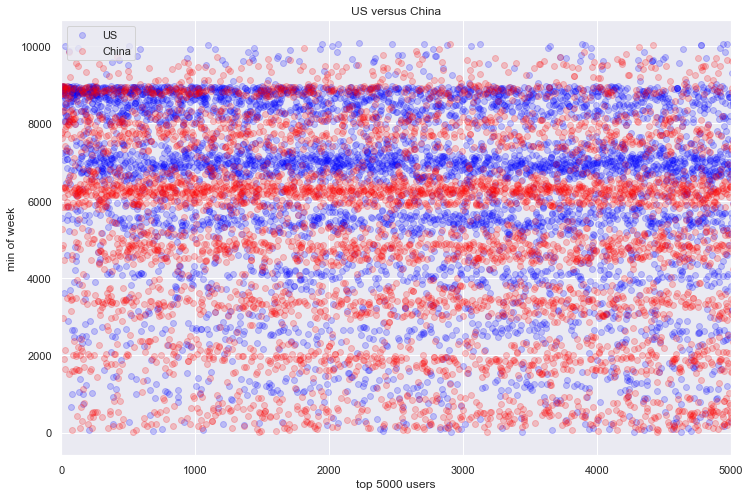

In [33]:
# eda
# what do time stamps look like
plt.figure(figsize=(12,8))
plt.scatter(y=df_us.minute_of_week, x=list(range(50000)), label='US', color='blue', alpha=0.2)
plt.scatter(y=df_chn.minute_of_week, x=list(range(49629)), label='China', color='red', alpha=0.2)
plt.xlabel('top 5000 users')
plt.ylabel('min of week')
plt.title('US versus China')
plt.legend()
plt.xlim(0, 5000)

plt.show()

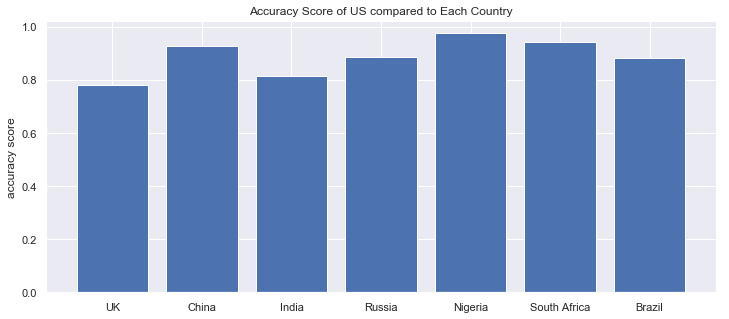

US most similar to UK
most different from Nigeria
model has more difficult time distinguishing between UK and US than US and Nigeria


In [23]:
# how different are time signals from US based on predictive models
# get scores

score_list = [acc_us_uk, acc_us_chn, acc_us_ind, acc_us_rus, acc_us_ng, acc_us_sa, acc_us_bra]

x = np.arange(7)
plt.figure(figsize=(12,5))
plt.bar(x, score_list)
plt.xticks(x, ('UK', 'China', 'India', 'Russia', 'Nigeria', 'South Africa', 'Brazil'))
plt.ylabel('accuracy score')
plt.title('Accuracy Score of US compared to Each Country')
plt.show()
print('US most similar to UK')
print('most different from Nigeria')
print('model has more difficult time distinguishing between UK and US than US and Nigeria')

In [24]:
# SELECT TOP 50000
#   u.id,
#   u.location,
#   u.LastAccessDate,
#   u.CreationDate,
#   COALESCE(p.activity,0) + COALESCE(c.activity,0) + COALESCE(v.activity, 0) AS activity
# FROM users u
# LEFT JOIN (
#   SELECT userid, COUNT(id) AS activity
#   FROM posthistory
#   GROUP BY userid
# ) as p ON ( p.userid = u.id )
# LEFT JOIN (
#   SELECT userid, COUNT(id) AS activity
#   FROM comments
#   GROUP BY userid
# ) as c ON ( c.userid = u.id )
# LEFT JOIN (
#   SELECT userid, COUNT(id) AS activity
#   FROM votes
#   GROUP BY userid
# ) as v ON ( v.userid = u.id )
# WHERE u.id > 0 and u.location is not null and u.location LIKE '%South Africa%'
# ORDER BY activity DESC;